In [42]:
import pandas as pd
import matplotlib.pyplot as plt

from graphgps.loader.dataset.voc_superpixels import VOCSuperpixels

In [43]:
df = pd.read_pickle('noising_experiment_gcn_1_graph.pickle')

In [44]:
# df = df.fillna(df['standard_prediction'])

In [45]:
df['standard_prediction_correct'] = df['truth'] == df['standard_prediction']
path_length_columns = df.filter(regex='path_length').columns

for path_length_column_name in path_length_columns:
    df[path_length_column_name] = df[path_length_column_name].fillna(df['standard_prediction'])
    df[path_length_column_name] = df[path_length_column_name].astype(int)
    correct_label = path_length_column_name.rstrip('_prediction') + '_correct'

    df[correct_label] = df[path_length_column_name] == df['truth']



In [46]:
path_length_columns

Index(['path_length_0_prediction', 'path_length_1_prediction',
       'path_length_2_prediction', 'path_length_3_prediction',
       'path_length_4_prediction', 'path_length_5_prediction',
       'path_length_6_prediction', 'path_length_7_prediction',
       'path_length_8_prediction', 'path_length_9_prediction',
       'path_length_10_prediction', 'path_length_11_prediction',
       'path_length_12_prediction', 'path_length_13_prediction',
       'path_length_14_prediction', 'path_length_15_prediction',
       'path_length_16_prediction', 'path_length_17_prediction',
       'path_length_18_prediction', 'path_length_19_prediction',
       'path_length_20_prediction'],
      dtype='object')

In [65]:
corrects = df.filter(regex='correct').sum()
corrects = (corrects/corrects.loc['standard_prediction_correct']).filter(regex='path')
corrects = corrects.to_frame().reset_index()
corrects['path_length'] = corrects['index'].str.split('_').apply(lambda x: x[2]).astype(int)
corrects = corrects.drop(columns=['index'])
corrects = corrects.rename(columns={0: 'relative_accuracy'})

<Axes: xlabel='path_length'>

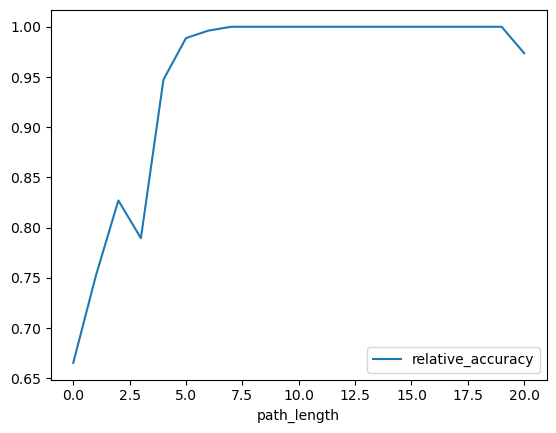

In [67]:
corrects.plot('path_length', 'relative_accuracy')

In [14]:
### Dataset load for validation
dataset = VOCSuperpixels(root='../../datasets/VOCSuperpixels',
                             slic_compactness=10,
                             name='edge_wt_only_coord',
                             split='test')

data = dataset[0]